In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Loads the business info data from JSON
business_info = pd.read_json("C:\\Users\\aasma\\OneDrive\Desktop\MSc\Sem2\Recommendation Systems\Content based recsys\json\meta-Illinois.json", lines=True)
business_info.to_csv("C:\\Users\\aasma\\OneDrive\\Desktop\\MSc\\Sem2\\Recommendation Systems\\Content based recsys\\csv\\business_info.csv", index=False)
business_info 

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,The Toy House,"The Toy House, 10 E Main St #105, East Dundee,...",0x880f0f1b32155555:0x8347e0c971acb955,None,42.098159,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
1,ROYAL LIQUOR,"ROYAL LIQUOR, 26W211 Geneva Rd, Wheaton, IL 60187",0x880e5523024703c1:0xb93a8ccb6918d616,None,41.887341,-88.136456,[Liquor store],3.6,8,None,"[[Thursday, 10AM–10PM], [Friday, 10AM–10:30PM]...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 10PM,"[0x880e55410d7a8187:0x9863102d1658ecf2, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
2,Carmi Taekwondo Center,"Carmi Taekwondo Center, 106 E Main St, Carmi, ...",0x8871a9d31e1aeeb1:0x79cee38dfa5a74c9,None,38.089658,-88.160471,[Taekwondo school],5.0,3,None,"[[Thursday, 4–9PM], [Friday, Closed], [Saturda...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 4PM,"[0x8871a82cca0a79a7:0x3294bb72dd9c1df6, 0x8871...",https://www.google.com/maps/place//data=!4m2!3...
3,Neikirk Alternative Heating,"Neikirk Alternative Heating, 8527 N 1250 Blvd,...",0x8871ec92b7b69123:0x5afcdb82d81c81ae,None,38.401572,-87.826757,[General contractor],3.0,1,None,None,None,None,"[0x8871ee91a3958faf:0x861162a80fe264d, 0x8871e...",https://www.google.com/maps/place//data=!4m2!3...
4,Barry Haggard Tank Truck Services,"Barry Haggard Tank Truck Services, 1309 Poplar...",0x8871ee802fd26b3f:0x9d664ba7e6ff48d8,None,38.419776,-87.775755,[Trucking company],5.0,1,None,None,None,None,"[0x8871f0bdfaf8239b:0xbdd9fc431aaa3b64, 0x8871...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179200,Flat Top Grill,"Flat Top Grill, 30 S Wabash Ave, Chicago, IL 6...",0x880e2ca48983cdf1:0x5d2a67e1d520723e,Stylish local chain where chefs prepare custom...,41.881128,-87.626389,"[Asian fusion restaurant, Health food restaura...",4.2,1696,$$,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–10:30P...","{'Service options': ['Curbside pickup', 'No-co...",NaN,"[0x880e2ca36e679e25:0xdac29eea722eac08, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
179201,Lou Malnati's Pizzeria,"Lou Malnati's Pizzeria, 805 S State St, Chicag...",0x880e2c99f4fba789:0x3391da854435bd98,Family-owned local chain for Italian classics ...,41.871561,-87.627286,"[Pizza restaurant, Caterer, Pizza delivery, Pi...",4.5,6212,$$,"[[Wednesday, 11AM–10PM], [Thursday, 11AM–10PM]...","{'Service options': ['Curbside pickup', 'No-co...",NaN,"[0x880e2c97fc977897:0xae7927db0ba74122, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
179202,The Gage,"The Gage, 24 S Michigan Ave, Chicago, IL 60603",0x880e2ca46b2bafe5:0x1d0780a2c49db10,Inventive American eats plus a long list of be...,41.881327,-87.624692,"[American restaurant, Cocktail bar, Gastropub]",4.5,2882,$$$,"[[Wednesday, 11AM–10PM], [Thursday, 11AM–10PM]...","{'Service options': ['Outdoor seating', 'Curbs...",NaN,"[0x880e2ca5345777f9:0x8f6aa29483b9e95b, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
179203,Sushi-san,"Sushi-san, 63 W Grand Ave, Chicago, IL 60654",0x880e2cb237a797c7:0xc4b7bcfdc7520f95,Stylish spot with a long sushi bar specializin...,41.891496,-87.630490,[Sushi restaurant],4.5,1008,$$,"[[Wednesday, 11AM–9PM], [Thursday, 11AM–9PM], ...","{'Service options': ['Curbside pickup', 'No-co...",NaN,"[0x880fd3532d726c77:0x7bb3f2ad3e6200be, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...


In [18]:
# Loads the reviewers info data from JSON
chunk_size = 1000000
json_reader = pd.read_json("C:\\Users\\aasma\\OneDrive\\Desktop\\MSc\\Sem2\\Recommendation Systems\\Content based recsys\\json\\review-Illinois_10.json", lines=True, chunksize=chunk_size)
chunks = []
for chunk in json_reader:
    chunks.append(chunk)
full_dataframe = pd.concat(chunks, ignore_index=True)
full_dataframe.to_csv("C:\\Users\\aasma\\OneDrive\\Desktop\\MSc\\Sem2\\Recommendation Systems\\Content based recsys\\csv\\output_full_dataframe.csv", index=False)

In [3]:
# Import the csv file of reviewers
reviews = pd.read_csv("C:\\Users\\aasma\\OneDrive\\Desktop\\MSc\\Sem2\\Recommendation Systems\\Content based recsys\\csv\\output_full_dataframe.csv")
reviews

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.094426e+20,Jim LeBurkien,1571842572977,5,Great selection of used and collectible toys. ...,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955
1,1.009245e+20,Steve Muscat,1561679275695,5,Great visit as usual. 👍😊,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955
2,1.008140e+20,Fletcher Oliver,1572719516502,5,NaN,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955
3,1.101685e+20,Daniel Chavez,1572641473424,5,NaN,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955
4,1.089906e+20,David Ferdinand,1561483351910,4,NaN,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955
...,...,...,...,...,...,...,...,...
13237843,1.087208e+20,Mitali Tarkar,1566593646840,3,NaN,NaN,NaN,0x880e2cba226c84eb:0x197a4e16d2e5b779
13237844,1.088937e+20,Kris Mucho Burger,1558471622569,5,NaN,NaN,"{'time': 1558699848444, 'text': 'Thank you Kri...",0x880e2cba226c84eb:0x197a4e16d2e5b779
13237845,1.135352e+20,David Phan,1480265092112,5,NaN,NaN,NaN,0x880e2cba226c84eb:0x197a4e16d2e5b779
13237846,1.136780e+20,Qi Zeng,1467732555625,5,NaN,NaN,NaN,0x880e2cba226c84eb:0x197a4e16d2e5b779


In [4]:
# Merge dataframes
merged_data = pd.merge(reviews, business_info, left_on='gmap_id', right_on='gmap_id', how='left')
merged_data

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,1.094426e+20,Jim LeBurkien,1571842572977,5,Great selection of used and collectible toys. ...,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955,The Toy House,"The Toy House, 10 E Main St #105, East Dundee,...",...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
1,1.094426e+20,Jim LeBurkien,1571842572977,5,Great selection of used and collectible toys. ...,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955,The Toy House,"The Toy House, 10 E Main St #105, East Dundee,...",...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
2,1.009245e+20,Steve Muscat,1561679275695,5,Great visit as usual. 👍😊,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955,The Toy House,"The Toy House, 10 E Main St #105, East Dundee,...",...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
3,1.009245e+20,Steve Muscat,1561679275695,5,Great visit as usual. 👍😊,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955,The Toy House,"The Toy House, 10 E Main St #105, East Dundee,...",...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
4,1.008140e+20,Fletcher Oliver,1572719516502,5,NaN,NaN,NaN,0x880f0f1b32155555:0x8347e0c971acb955,The Toy House,"The Toy House, 10 E Main St #105, East Dundee,...",...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246705,1.087208e+20,Mitali Tarkar,1566593646840,3,NaN,NaN,NaN,0x880e2cba226c84eb:0x197a4e16d2e5b779,Luke's Lobster City Hall,"Luke's Lobster City Hall, 134 N LaSalle St, Ch...",...,-87.632653,"[Seafood restaurant, Restaurant]",4.4,598,$$,None,"{'Service options': ['Outdoor seating', 'Deliv...",NaN,"[0x880e2ca7f8d5f767:0xfb279aa8a114dc27, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
13246706,1.088937e+20,Kris Mucho Burger,1558471622569,5,NaN,NaN,"{'time': 1558699848444, 'text': 'Thank you Kri...",0x880e2cba226c84eb:0x197a4e16d2e5b779,Luke's Lobster City Hall,"Luke's Lobster City Hall, 134 N LaSalle St, Ch...",...,-87.632653,"[Seafood restaurant, Restaurant]",4.4,598,$$,None,"{'Service options': ['Outdoor seating', 'Deliv...",NaN,"[0x880e2ca7f8d5f767:0xfb279aa8a114dc27, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
13246707,1.135352e+20,David Phan,1480265092112,5,NaN,NaN,NaN,0x880e2cba226c84eb:0x197a4e16d2e5b779,Luke's Lobster City Hall,"Luke's Lobster City Hall, 134 N LaSalle St, Ch...",...,-87.632653,"[Seafood restaurant, Restaurant]",4.4,598,$$,None,"{'Service options': ['Outdoor seating', 'Deliv...",NaN,"[0x880e2ca7f8d5f767:0xfb279aa8a114dc27, 0x880e...",https://www.google.com/maps/place//data=!4m2!3...
13246708,1.136780e+20,Qi Zeng,1467732555625,5,NaN,NaN,NaN,0x880e2cba226c84eb:0x197a4e16d2e5b779,Luke's Lobster City Hall,"Luke's Lobster City Hall, 134 N LaSalle St, Ch...",...,-87.632653,"[Seafood restaurant, Restaurant]",4.4,598,$$,None,"{'Serv

# 1. Exploratory Data Analysis

###  *EDA for reviews-illinois data containing information about reviews*

In [19]:
reviews.isnull().sum()

user_id           0
name             43
time              0
rating            0
text        6247890
pics       12893743
resp       11930867
gmap_id           0
year              0
dtype: int64

Findings:
- Names of 43 users are not available.
- 6,247,890 users haven't provided a text review.
- 12,893,743 reviews don't have pictures attached to them.
- 11,930,867 reviews weren't responded to by the company.

In [20]:
reviews.dtypes

user_id           float64
name               object
time       datetime64[ns]
rating              int64
text               object
pics               object
resp               object
gmap_id            object
year                int64
dtype: object

In [21]:
# Counts number of reviews for each rating
rating_counts = reviews['rating'].value_counts()
print("Number of reviews wih respect to rating:\n", rating_counts)

Number of reviews wih respect to rating:
 5    7805812
4    3016426
3    1334192
1     638433
2     442985
Name: rating, dtype: int64


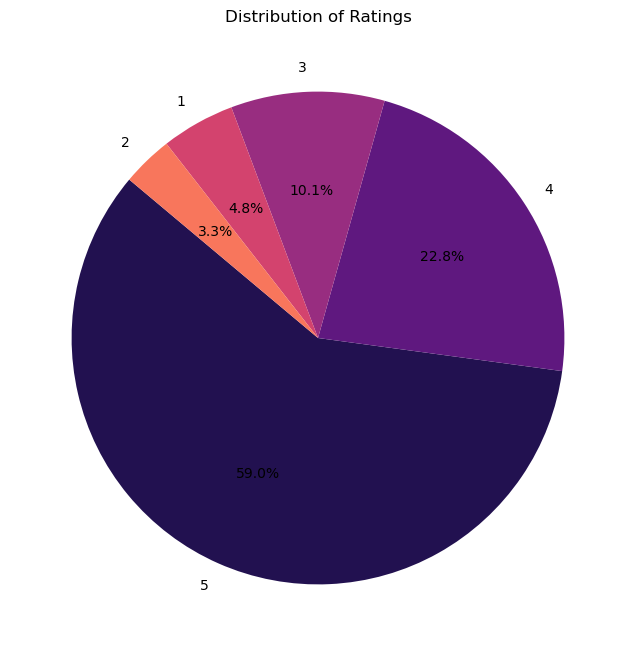

In [22]:
# Pie plot showing distribution of ratings
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'))
plt.title('Distribution of Ratings')
plt.show()

Findings:
- Most users have given the rating of 5 followed by 4,3,2,1.

###  *EDA for metadata containing information about businesses*

In [23]:
business_info.isnull().sum()

name                     0
address               2163
gmap_id                  0
description         142537
latitude                 0
longitude                0
category               719
avg_rating               0
num_of_reviews           0
price               141228
hours                39318
MISC                 31677
state                51946
relative_results     12589
url                      0
dtype: int64

Findings:
- Address information is not available for 2,163 businesses.
- Description is not available for 142,537 businesses.
- Category information is not available for 719 businesses.
- Pricing details are not available for 141,228 businesses.
- Open hours information is not available for 39,318 businesses.
- MISC information is not available for 31,677 businesses.
- Current status is not available for 51,946 businesses.
- Relative results information is not available for 12,589 businesses.

In [24]:
business_info.dtypes

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object

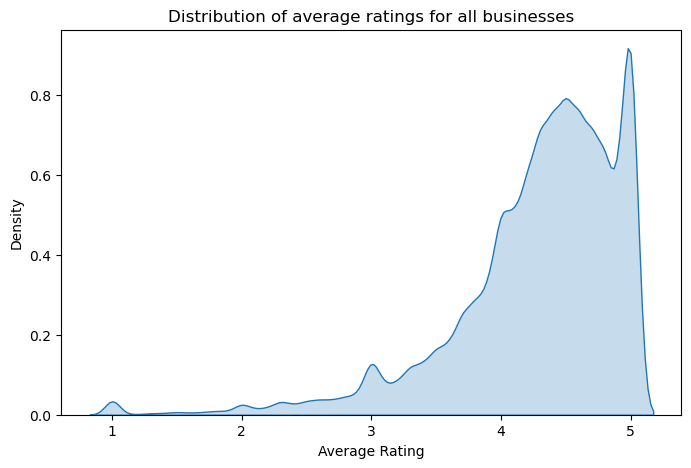

In [25]:
# Plot to show distribution of average ratings of businesses
# Density plot for to have smoothed representation of the distribution because it is a continuous variable
plt.figure(figsize=(8, 5))
sns.kdeplot(business_info['avg_rating'], fill=True, palette='magma')
plt.title('Distribution of average ratings for all businesses')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.show()

Findings:
- Distribution is skewed towards the right indicating that most of the businesses have a higher rating.

In [26]:
# Businesses with the highest ratings
company_ratings = business_info.sort_values(by='avg_rating', ascending=False).head(10)
company_ratings[['name', 'avg_rating']]

,name,avg_rating
66395,Quality Cleaners,5.0
67404,Southern IL Dermatology PC,5.0
20900,"Shorewood,IL Water Tower",5.0
20899,Ford Heights Water Tower,5.0
20898,Lisle Water Tower,5.0
46556,True Church-The House-Prayer,5.0
80854,DSP Insurance Services,5.0
67432,AGG Roofing,5.0
80856,Burger Shack,5.0
102606,Gogolinski-Trofimuk Funeral Home,5.0


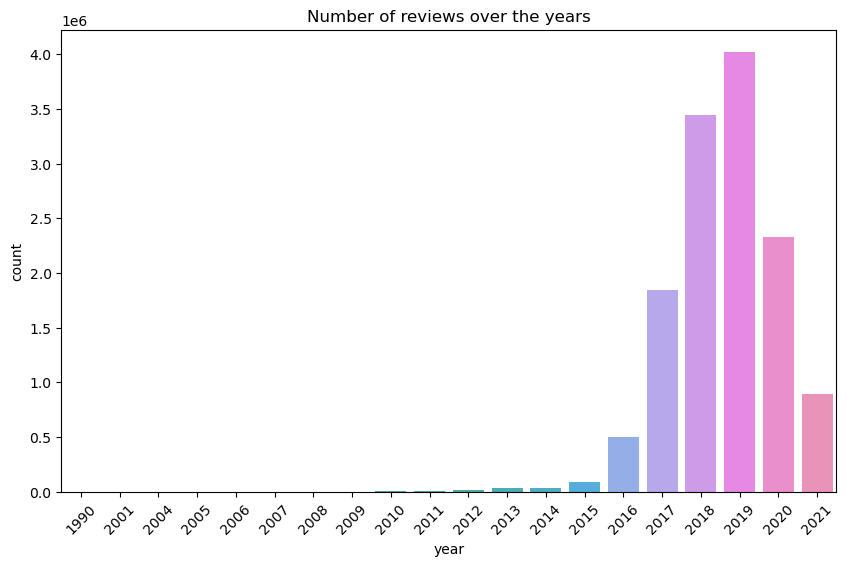

In [27]:
# Plot to show number of reviews over the years

#converting time
reviews['time'] = pd.to_datetime(reviews['time'], unit='ms')
reviews['year'] = reviews['time'].dt.year

plt.figure(figsize=(10, 6)) 
sns.countplot(x='year', data=reviews)
plt.title('Number of reviews over the years')
plt.xticks(rotation=45) 
plt.show()

###  *EDA on the business name by merging the dataset*

In [30]:
# Converting complex gmap ids into integers
merged_data['gmap_id'] = merged_data['gmap_id'].rank(method='dense').astype(int)
merged_data.head()

,user_id,name_x,time,rating,text,pics,resp,gmap_id,year,name_y,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,1.094426e+20,Jim LeBurkien,2019-10-23 14:56:12.977,5,Great selection of used and collectible toys. ...,NaN,NaN,60377,2019,The Toy House,...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
1,1.094426e+20,Jim LeBurkien,2019-10-23 14:56:12.977,5,Great selection of used and collectible toys. ...,NaN,NaN,60377,2019,The Toy House,...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
2,1.009245e+20,Steve Muscat,2019-06-27 23:47:55.695,5,Great visit as usual. 👍😊,NaN,NaN,60377,2019,The Toy House,...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
3,1.009245e+20,Steve Muscat,2019-06-27 23:47:55.695,5,Great visit as usual. 👍😊,NaN,NaN,60377,2019,The Toy House,...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...
4,1.008140e+20,Fletcher Oliver,2019-11-02 18:31:56.502,5,NaN,NaN,NaN,60377,2019,The Toy House,...,-88.275237,[Toy store],4.9,17,None,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...",{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f...",https://www.google.com/maps/place//data=!4m2!3...


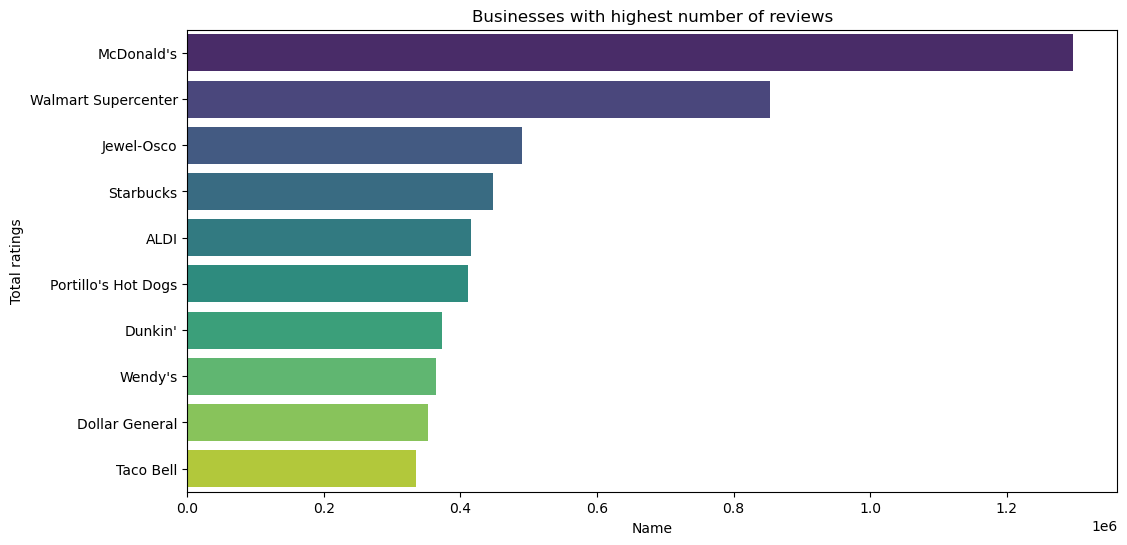

In [32]:
# Plot of businesses with the most reviews

# Total ratings per company
company_reviews = merged_data.groupby('name_y')['rating'].sum().reset_index()

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='name_y', data=company_reviews.sort_values(by='rating', ascending=False).head(10), palette='viridis')
plt.title('Businesses with highest number of reviews')
plt.xlabel('Name')
plt.ylabel('Total ratings')
plt.show()

Findings
- McDonald's has got the highest number of reviews followed by walmart, jewel-osco, and so on

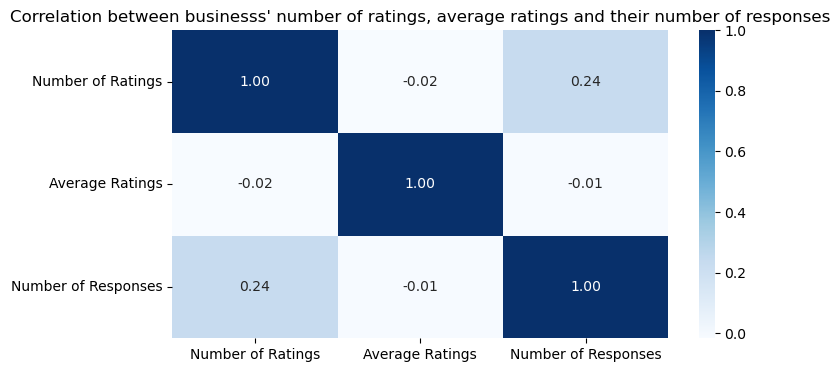

In [30]:
# Heatmap to show relation between some variables

# Calculate the number of ratings, average ratings, and number of responses
ratings_counts = merged_data.groupby('name_y')['rating'].sum()
average_ratings = merged_data.groupby('name_y')['rating'].mean()
responses_counts = merged_data.groupby('name_y')['resp'].apply(lambda x: x.notnull().sum())

# Create a heatmap
heatmap_data = pd.DataFrame({'Number of Ratings': ratings_counts,
                             'Average Ratings': average_ratings,
                             'Number of Responses': responses_counts})
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation between businesss' number of ratings, average ratings and their number of responses")
plt.show()

Findings:
1. Their is a moderately positive correlation (0.24) between the number of ratings and number of responses, indicating that higher-rated businesses tend to receive more responses. 

2. The correlation between average ratings and both the quantity of ratings and responses is very weak, implying that the quantity of ratings from users and responses from the business does not significantly influence a business's average rating.

# 2. Feature extraction

### *Feature extraction from metadata (data containing information about businesses)*

In [33]:
# Removing non-essential columns 
business_info.drop(axis=0, inplace=True, columns=['address', 'latitude', 'longitude', 'url', 'hours'])
business_info.head()

,name,gmap_id,description,category,avg_rating,num_of_reviews,price,MISC,state,relative_results
0,The Toy House,0x880f0f1b32155555:0x8347e0c971acb955,None,[Toy store],4.9,17,None,{'Accessibility': ['Wheelchair accessible entr...,Permanently closed,"[0x880f72a26e93c371:0xed11dd45ac49ed11, 0x880f..."
1,ROYAL LIQUOR,0x880e5523024703c1:0xb93a8ccb6918d616,None,[Liquor store],3.6,8,None,"{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 10PM,"[0x880e55410d7a8187:0x9863102d1658ecf2, 0x880e..."
2,Carmi Taekwondo Center,0x8871a9d31e1aeeb1:0x79cee38dfa5a74c9,None,[Taekwondo school],5.0,3,None,{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 4PM,"[0x8871a82cca0a79a7:0x3294bb72dd9c1df6, 0x8871..."
3,Neikirk Alternative Heating,0x8871ec92b7b69123:0x5afcdb82d81c81ae,None,[General contractor],3.0,1,None,None,None,"[0x8871ee91a3958faf:0x861162a80fe264d, 0x8871e..."
4,Barry Haggard Tank Truck Services,0x8871ee802fd26b3f:0x9d664ba7e6ff48d8,None,[Trucking company],5.0,1,None,None,None,"[0x8871f0bdfaf8239b:0xbdd9fc431aaa3b64, 0x8871..."


In [34]:
# Filtering Out Permanently Closed Businesses
(business_info['state'] == 'Permanently closed').sum()
business_info = business_info[business_info.state != 'Permanently closed']
business_info.head()

,name,gmap_id,description,category,avg_rating,num_of_reviews,price,MISC,state,relative_results
1,ROYAL LIQUOR,0x880e5523024703c1:0xb93a8ccb6918d616,None,[Liquor store],3.6,8,None,"{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 10PM,"[0x880e55410d7a8187:0x9863102d1658ecf2, 0x880e..."
2,Carmi Taekwondo Center,0x8871a9d31e1aeeb1:0x79cee38dfa5a74c9,None,[Taekwondo school],5.0,3,None,{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 4PM,"[0x8871a82cca0a79a7:0x3294bb72dd9c1df6, 0x8871..."
3,Neikirk Alternative Heating,0x8871ec92b7b69123:0x5afcdb82d81c81ae,None,[General contractor],3.0,1,None,None,None,"[0x8871ee91a3958faf:0x861162a80fe264d, 0x8871e..."
4,Barry Haggard Tank Truck Services,0x8871ee802fd26b3f:0x9d664ba7e6ff48d8,None,[Trucking company],5.0,1,None,None,None,"[0x8871f0bdfaf8239b:0xbdd9fc431aaa3b64, 0x8871..."
5,First Church of the Nazarene,0x8871ee8fbf3a3445:0xc54f7510d1d065f4,None,[Church of the Nazarene],5.0,1,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8871ee8e3d25c62d:0x2b3d4ed6f87aca76, 0x8871..."


In [35]:
# Assigning tags to price variable

def return_price(val):
    if val is None or val == '':
        return ''
    num_dollars = val.count('$') if '$' in val else 0
    if num_dollars == 1:
        return 'Cheap'
    elif num_dollars == 2:
        return 'Budget Friendly'
    elif num_dollars == 3:
        return 'Expensive'
    else:
        return 'Very Expensive'

business_info['price'] = business_info['price'].apply(return_price)
business_info.head()

,name,gmap_id,description,category,avg_rating,num_of_reviews,price,MISC,state,relative_results
1,ROYAL LIQUOR,0x880e5523024703c1:0xb93a8ccb6918d616,None,[Liquor store],3.6,8,,"{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 10PM,"[0x880e55410d7a8187:0x9863102d1658ecf2, 0x880e..."
2,Carmi Taekwondo Center,0x8871a9d31e1aeeb1:0x79cee38dfa5a74c9,None,[Taekwondo school],5.0,3,,{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 4PM,"[0x8871a82cca0a79a7:0x3294bb72dd9c1df6, 0x8871..."
3,Neikirk Alternative Heating,0x8871ec92b7b69123:0x5afcdb82d81c81ae,None,[General contractor],3.0,1,,None,None,"[0x8871ee91a3958faf:0x861162a80fe264d, 0x8871e..."
4,Barry Haggard Tank Truck Services,0x8871ee802fd26b3f:0x9d664ba7e6ff48d8,None,[Trucking company],5.0,1,,None,None,"[0x8871f0bdfaf8239b:0xbdd9fc431aaa3b64, 0x8871..."
5,First Church of the Nazarene,0x8871ee8fbf3a3445:0xc54f7510d1d065f4,None,[Church of the Nazarene],5.0,1,,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x8871ee8e3d25c62d:0x2b3d4ed6f87aca76, 0x8871..."


### *Feature extraction from reviews-illinois data (data containing information about reviews)*

In [36]:
# Removing non-essential columns 
reviews.drop(axis=0, inplace=True, columns=['time', 'pics', 'resp'])
reviews.head()

,user_id,name,rating,text,gmap_id,year
0,1.094426e+20,Jim LeBurkien,5,Great selection of used and collectible toys. ...,0x880f0f1b32155555:0x8347e0c971acb955,2019
1,1.009245e+20,Steve Muscat,5,Great visit as usual. 👍😊,0x880f0f1b32155555:0x8347e0c971acb955,2019
2,1.008140e+20,Fletcher Oliver,5,NaN,0x880f0f1b32155555:0x8347e0c971acb955,2019
3,1.101685e+20,Daniel Chavez,5,NaN,0x880f0f1b32155555:0x8347e0c971acb955,2019
4,1.089906e+20,David Ferdinand,4,NaN,0x880f0f1b32155555:0x8347e0c971acb955,2019


In [37]:
# Converting complex user ids into integers
reviews['user_id'] = reviews['user_id'].rank(method='dense').astype(int)
reviews.head()

,user_id,name,rating,text,gmap_id,year
0,221337,Jim LeBurkien,5,Great selection of used and collectible toys. ...,0x880f0f1b32155555:0x8347e0c971acb955,2019
1,21694,Steve Muscat,5,Great visit as usual. 👍😊,0x880f0f1b32155555:0x8347e0c971acb955,2019
2,19076,Fletcher Oliver,5,NaN,0x880f0f1b32155555:0x8347e0c971acb955,2019
3,238263,Daniel Chavez,5,NaN,0x880f0f1b32155555:0x8347e0c971acb955,2019
4,210647,David Ferdinand,4,NaN,0x880f0f1b32155555:0x8347e0c971acb955,2019
